In [1]:
from skimage import io, util, filters, measure
import skimage
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import math
import os
from myImageLib import dirrec, to8bit, bpass, FastPeakFind, track_spheres_dt
from IPython.display import clear_output, display
import trackpy as tp
from skimage.morphology import skeletonize
from scipy import ndimage
from xiaolei.chain.tracking import dt_track, dt_track_1, get_chain_mask

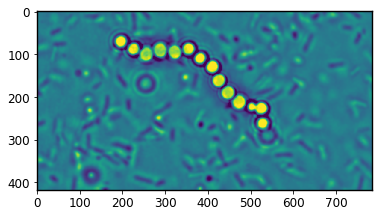

In [2]:
%matplotlib inline
img = io.imread(r'I:\Github\Python\mylib\xiaolei\chain\test_files\bad\0008.tif')
plt.imshow(img)

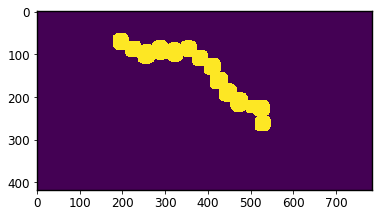

In [3]:
plt.imshow(get_chain_mask(img, feature_size=10000))

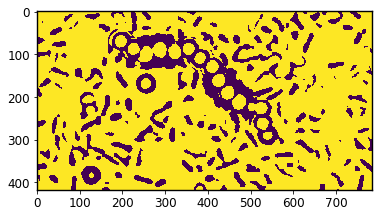

In [7]:
filt = img > filters.threshold_isodata(img)
plt.imshow(filt)

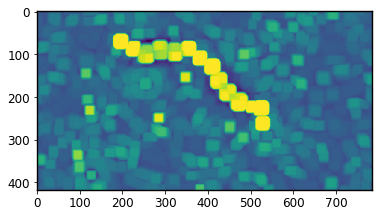

In [72]:
maxfilt = ndimage.maximum_filter(img, size=15)
plt.imshow(maxfilt)

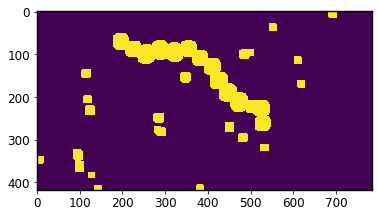

In [73]:
maxfilt_thres = maxfilt > filters.threshold_isodata(maxfilt)
plt.imshow(maxfilt_thres)

In [74]:
label_image = measure.label(maxfilt_thres, connectivity=1)
for region in measure.regionprops(label_image):
    if region.area < 10000:
        continue
    coords = region.coords
    break

In [75]:
img1 = np.zeros(img.shape)
img1[coords[:, 0], coords[:, 1]] = 1

In [76]:
coords.shape

(18011, 2)

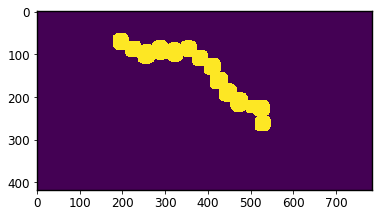

In [78]:
plt.imshow(img1)

In [5]:
def get_chain_mask(img, feature_size=10000, feature_number=1):
    maxfilt = ndimage.maximum_filter(img, size=15)
    maxfilt_thres = maxfilt > filters.threshold_isodata(maxfilt)
    label_image = measure.label(maxfilt_thres, connectivity=1)
    num = 0
    coordsL = []
    for region in measure.regionprops(label_image):
        if region.area < feature_size:
            continue
        print(region.area)
        coordsL.append(region.coords)
        num += 1
        if num > feature_number:
            break
    mask = np.zeros(img.shape)
    for coords in coordsL:
        mask[coords[:, 0], coords[:, 1]] = 1
    return mask

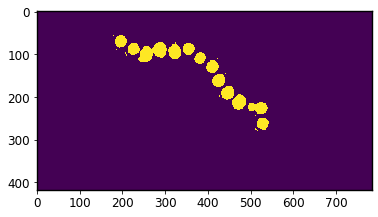

In [8]:
mask = get_chain_mask(img)
masked_filt = mask * filt
plt.imshow(masked_filt)

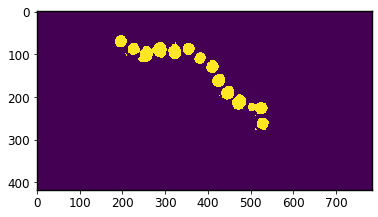

In [9]:
despeck = ndimage.median_filter(masked_filt, size=3)
plt.imshow(despeck)

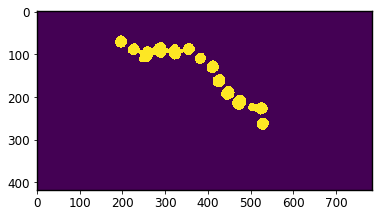

In [13]:
despeck = ndimage.median_filter(masked_filt, size=10)
plt.imshow(despeck)

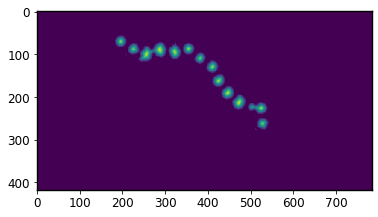

In [82]:
dt = ndimage.distance_transform_edt(despeck)
plt.imshow(dt)

In [83]:
cent = FastPeakFind(dt)

In [2]:
img = io.imread(r'R:\Dip\DNA_chain\fluorescent\problem_image\0299.tif')

In [3]:
mask = get_chain_mask(img)
isod = img > filters.threshold_isodata(img)
masked_isod = mask * isod
despeck = ndimage.median_filter(masked_isod, size=10)
dt = ndimage.distance_transform_edt(despeck)
cent = FastPeakFind(dt)

In [7]:
max_coor, pk_value = track_spheres_dt(dt, 15)

In [8]:
max_coor.shape

(2, 15)

Text(10, 40, 'distance_transform')

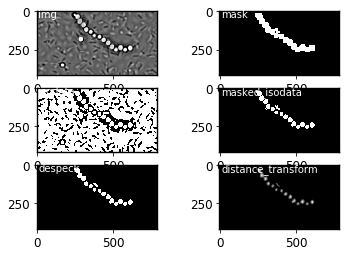

In [16]:
fig, ax = plt.subplots(3, 2)
ax[0, 0].imshow(img, cmap='gray')
ax[0, 0].text(10, 40, 'img', c='white')
ax[0, 1].imshow(mask, cmap='gray')
ax[0, 1].text(10, 40, 'mask', c='white')
ax[1, 0].imshow(isod, cmap='gray')
ax[1, 0].text(10, 40, 'isodata', c='white')
ax[1, 1].imshow(masked_isod, cmap='gray')
ax[1, 1].text(10, 40, 'masked_isodata', c='white')
ax[2, 0].imshow(despeck, cmap='gray')
ax[2, 0].text(10, 40, 'despeck', c='white')
ax[2, 1].imshow(dt, cmap='gray')
ax[2, 1].text(10, 40, 'distance_transform', c='white')

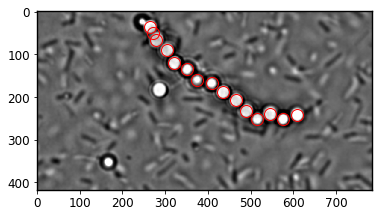

In [9]:
plt.imshow(img, cmap='gray')
plt.plot(max_coor[1, :], max_coor[0, :], marker='o', markersize=12, ls='', mec='red', mfc=(0,0,0,0))

In [15]:
pk_value

array([16.03121954, 15.5241747 , 15.26433752, 15.        , 14.86606875,
       14.76482306, 14.2126704 , 13.92838828, 13.89244399, 12.04159458,
       12.        , 11.66190379, 11.40175425, 10.63014581,  8.94427191,
        7.07106781,  7.07106781,  6.70820393])

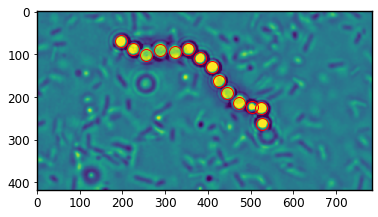

In [3]:
plt.imshow(img)
plt.plot(cent[1, :], cent[0, :], marker='o', markersize=12, ls='', mec='red', mfc=(0,0,0,0))